In [1]:
#install catboost
!pip install catboost

In [2]:
# import all libraries
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from catboost import CatBoostClassifier
from catboost import CatBoost
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score
from sklearn.decomposition import PCA
from sklearn import linear_model

In [3]:
# read csv
df = pd.read_csv("heart.csv")

In [4]:
# separate dataframes
target_col = "target"
X = df.loc[:, df.columns != target_col]
y = df.loc[:, target_col]

In [5]:
# separate train and test datas
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.33, 
                                                    random_state=42)

In [6]:
# train catboost
model_cb = CatBoostClassifier(task_type='GPU', iterations=200, 
                              random_state = 700, 
                              eval_metric="F1")

In [7]:
# train catboost
model_cb.fit(X_train, y_train, plot=True, 
             
             eval_set=(X_test, y_test))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.143156
0:	learn: 0.8975741	test: 0.8376068	best: 0.8376068 (0)	total: 16ms	remaining: 3.19s
1:	learn: 0.9146006	test: 0.8470588	best: 0.8470588 (1)	total: 30.7ms	remaining: 3.04s
2:	learn: 0.9393939	test: 0.8809524	best: 0.8809524 (2)	total: 43ms	remaining: 2.82s
3:	learn: 0.9469388	test: 0.8947368	best: 0.8947368 (3)	total: 56.1ms	remaining: 2.75s
4:	learn: 0.9480874	test: 0.8941176	best: 0.8947368 (3)	total: 68.6ms	remaining: 2.67s
5:	learn: 0.9466484	test: 0.8875740	best: 0.8947368 (3)	total: 79.9ms	remaining: 2.58s
6:	learn: 0.9437586	test: 0.8842730	best: 0.8947368 (3)	total: 92.4ms	remaining: 2.55s
7:	learn: 0.9509537	test: 0.8973607	best: 0.8973607 (7)	total: 107ms	remaining: 2.56s
8:	learn: 0.9470828	test: 0.8947368	best: 0.8973607 (7)	total: 120ms	remaining: 2.54s
9:	learn: 0.9590164	test: 0.9058824	best: 0.9058824 (9)	total: 131ms	remaining: 2.5s
10:	learn: 0.9643836	test: 0.9096210	best: 0.9096210 (10)	total: 147ms	remaining: 2.52s
11:	learn: 0.9602195

In [8]:
# using catboost to predict 
y_pred = model_cb.predict(X_test)

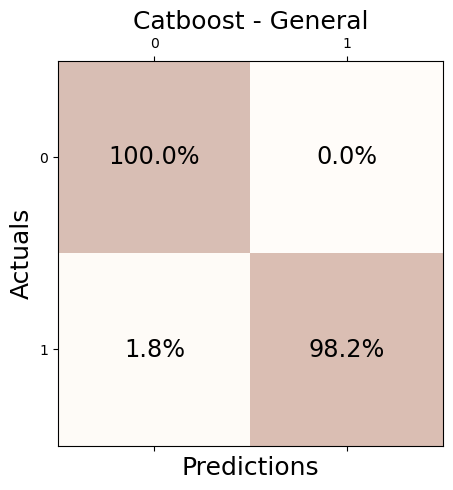

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
# Calculate the confusion matrix
#
conf_matrix = confusion_matrix(y_test, y_pred.round(0).astype(int),normalize='true')
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=str(round(conf_matrix[i, j]*100,1))+'%', va='center', ha='center', size='xx-large')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Catboost - General', fontsize=18)
plt.show()

In [10]:
# calculating classification report
from sklearn.metrics import classification_report
classification_report = classification_report(y_test, y_pred)
print(classification_report)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       171
           1       1.00      0.98      0.99       168

    accuracy                           0.99       339
   macro avg       0.99      0.99      0.99       339
weighted avg       0.99      0.99      0.99       339



In [11]:
# create new dataframe with filtered datas
ndf = df[['age','sex', 'trestbps','fbs',
       'restecg','thalach', 'oldpeak','slope']]

In [12]:
# separate dataframes
target_col = "target"
X = ndf.loc[:, ndf.columns ]
y = df.loc[:, target_col]

In [13]:
# separating train and test datas
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.33, 
                                                    random_state=42)

In [14]:
# train catboost
model_cb = CatBoostClassifier(task_type='GPU', iterations=200, 
                              random_state = 700, 
                              eval_metric="F1")

In [15]:
# train castboost
model_cb.fit(X_train, y_train, plot=True, 
             eval_set=(X_test, y_test))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.143156
0:	learn: 0.8188105	test: 0.7964072	best: 0.7964072 (0)	total: 20ms	remaining: 3.97s
1:	learn: 0.8721591	test: 0.8213166	best: 0.8213166 (1)	total: 36.7ms	remaining: 3.63s
2:	learn: 0.8676056	test: 0.8206687	best: 0.8213166 (1)	total: 52ms	remaining: 3.42s
3:	learn: 0.8638239	test: 0.8343195	best: 0.8343195 (3)	total: 63.7ms	remaining: 3.12s
4:	learn: 0.8913343	test: 0.8605341	best: 0.8605341 (4)	total: 75.2ms	remaining: 2.93s
5:	learn: 0.8910345	test: 0.8554217	best: 0.8605341 (4)	total: 86.6ms	remaining: 2.8s
6:	learn: 0.9019074	test: 0.8750000	best: 0.8750000 (6)	total: 97.4ms	remaining: 2.68s
7:	learn: 0.9105691	test: 0.8823529	best: 0.8823529 (7)	total: 108ms	remaining: 2.59s
8:	learn: 0.9159892	test: 0.8908555	best: 0.8908555 (8)	total: 120ms	remaining: 2.55s
9:	learn: 0.9241192	test: 0.9037901	best: 0.9037901 (9)	total: 131ms	remaining: 2.49s
10:	learn: 0.9316940	test: 0.9144543	best: 0.9144543 (10)	total: 141ms	remaining: 2.42s
11:	learn: 0.9322493

In [16]:
# using catboost to predict
y_pred = model_cb.predict(X_test)

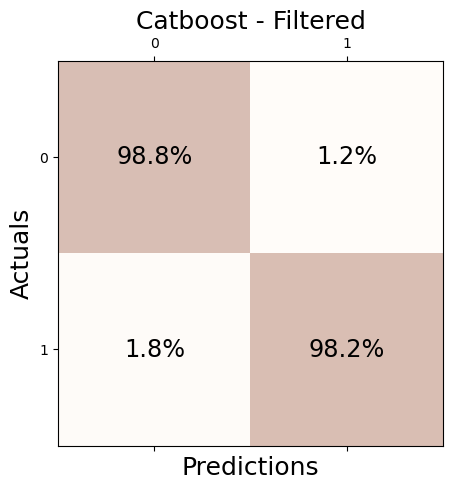

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
# Calculate the confusion matrix
#
conf_matrix = confusion_matrix(y_test, y_pred.round(0).astype(int),normalize='true')
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=str(round(conf_matrix[i, j]*100,1))+'%', va='center', ha='center', size='xx-large')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Catboost - Filtered', fontsize=18)
plt.show()

In [18]:
# calculating classification report
from sklearn.metrics import classification_report
classification_report = classification_report(y_test, y_pred)
print(classification_report)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       171
           1       0.99      0.98      0.99       168

    accuracy                           0.99       339
   macro avg       0.99      0.99      0.99       339
weighted avg       0.99      0.99      0.99       339

